# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Amien Ramdhani
- Email: dhanimacbull@gmail.com
- Id Dicoding: amienramdhani

## Menentukan Pertanyaan Bisnis


- Berapa Kecepatan Rata rata angin pada tahun 2011
-  Berapa jumlah penyewa sepeda yang telah terdaftar dan yang belum terdaftar di tiap tahun

## Menyiapkan semua library yang dibuthkan

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [27]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

##### Menilai Tabel day_df

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [29]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [30]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [31]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Membersihkan day_df

Mengubah tipe data dteday menjadi tipe data datetime

In [32]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [33]:
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

In [34]:
col = ['season', 'holiday', 'weekday',
       'workingday', 'weathersit']

In [35]:
for i in col:
  if i in day_df.columns.to_list():
    day_df[i] = day_df[i].astype('category')

In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

In [37]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [38]:
day_df.describe()

,instant,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [39]:
for i in col:
    print("Name of {} col".format(i)) #Name of Col
    print("No. of NUnique", day_df[i].nunique()) #Total Nunique Values
    print("Unique Values", day_df[i].unique())# All unique vales
    print('*'*30) # to make differnce i each col
    print()
    print()

Name of season col
No. of NUnique 4
Unique Values [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
******************************


Name of holiday col
No. of NUnique 2
Unique Values [0, 1]
Categories (2, int64): [0, 1]
******************************


Name of weekday col
No. of NUnique 7
Unique Values [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
******************************


Name of workingday col
No. of NUnique 2
Unique Values [0, 1]
Categories (2, int64): [0, 1]
******************************


Name of weathersit col
No. of NUnique 3
Unique Values [2, 1, 3]
Categories (3, int64): [1, 2, 3]
******************************




## Exploratory Data Analysis (EDA)

### Explore day_df

In [40]:
day_df.describe(include='all')

<ipython-input-40-a3f85d0fb009>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.000000,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,NaN,NaN,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,NaN,NaN,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Mengurutkan Jumlah Peminjam Sepeda berdasarkan tahunnya

In [41]:
day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

yr
1    356
0    352
Name: cnt, dtype: int64

Mengurutkan Jumlah Peminjam Sepeda berdasarkan bulan

In [42]:
day_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False)

mnth
1     62
5     62
7     62
8     62
10    62
12    62
3     60
4     60
6     60
9     60
11    60
2     57
Name: cnt, dtype: int64

Mengurutkan Jumlah Peminjam Sepeda berdasarkan Musim

In [43]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

Mencari Kecepatan maksimal,minimal,dan rata-rata dari angin berdasarkan tahun

In [44]:
day_df.groupby(by="yr").agg({
    "windspeed": ["max", "min", "mean"]
})

windspeed                     
          max       min       mean
yr                                
0   34.000021  1.500244  12.823977
1   29.584721  3.125550  12.701344

Mencari maksimal,minimal,dan rata-rata dari temperature berdasarkan tahun

In [45]:
day_df.groupby(by="yr").agg({
    "temp": ["max", "min", "mean"]
})

temp                     
          max       min       mean
yr                                
0   34.815847  2.424346  19.953263
1   35.328347  4.407500  20.667313

In [46]:
day_df.groupby(by="season").agg({
    "temp": ["max", "min", "mean"]
})

temp                      
              max        min       mean
season                                 
1       23.472500   2.424346  12.207650
2       33.141653  10.374763  22.320611
3       35.328347  19.235847  28.958682
4       26.957500   9.054153  17.339148

In [47]:
day_df.groupby(by="season").agg({
    "windspeed": ["max", "min", "mean"]
})

windspeed                     
              max       min       mean
season                                
1       34.000021  3.042356  14.373984
2       26.000489  4.417256  13.634978
3       25.166339  4.292744  11.530366
4       28.292425  1.500244  11.523637

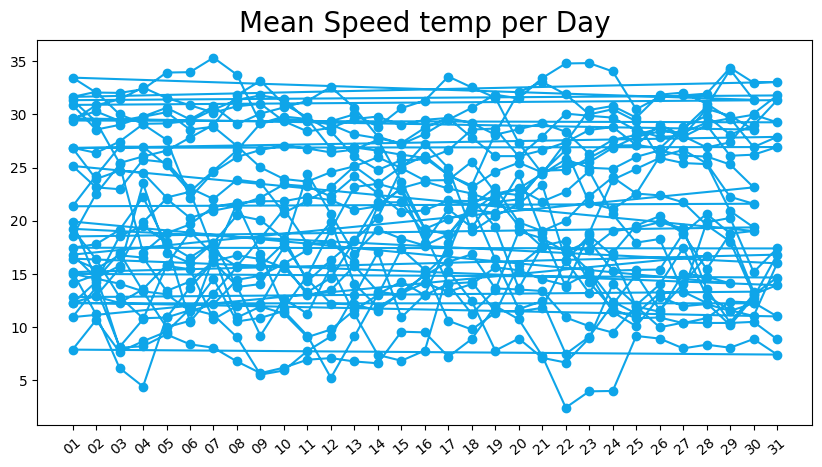

In [48]:
day_temp = day_df.resample(rule='D', on='dteday').agg({
    "temp": "mean"
})

day_temp.index = day_temp.index.strftime('%d')

plt.figure(figsize=(10, 5))
plt.plot(day_temp.index, day_temp['temp'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Mean Speed temp per Day', loc='center', fontsize=20)
plt.show()

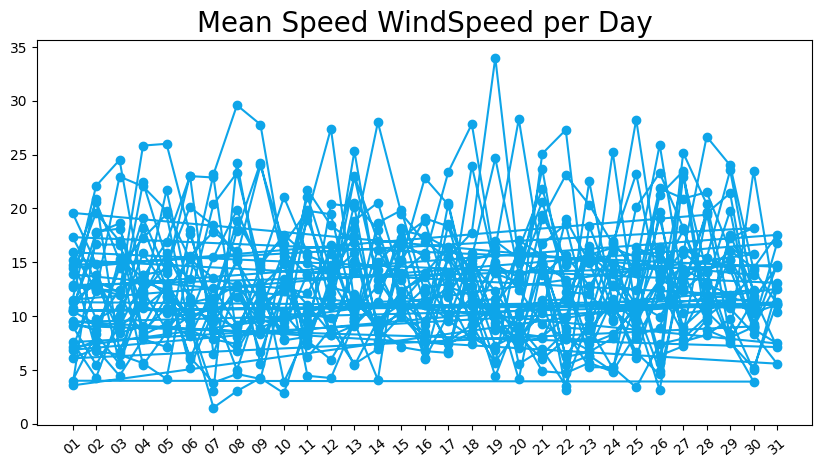

In [49]:
day_wind = day_df.resample(rule='D', on='dteday').agg({
    "windspeed": "mean"
})

day_wind.index = day_wind.index.strftime('%d')

plt.figure(figsize=(10, 5))
plt.plot(day_wind.index, day_wind['windspeed'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Mean Speed WindSpeed per Day', loc='center', fontsize=20)
plt.show()

## Visualization & Explanatory Analysis

## Pertanyaan 1:
Berapa Rata Rata Kecepatan Angin Pada tahun 2011,Berapa Suhu Temperature pada tahun 2011



In [50]:
day_df.groupby(by="yr").agg({
    "windspeed": ["max", "min", "mean"]
})

windspeed                     
          max       min       mean
yr                                
0   34.000021  1.500244  12.823977
1   29.584721  3.125550  12.701344

In [51]:
day_df[day_df.mnth == 4]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
90,91,2011-04-01,2,0,4,0,5,1,2,12.300000,14.17270,68.6250,17.333436,307,1920,2227
91,92,2011-04-02,2,0,4,0,6,0,2,12.915000,15.78185,65.3750,13.208782,898,1354,2252
92,93,2011-04-03,2,0,4,0,0,0,1,15.511653,18.93835,48.0000,12.208271,1651,1598,3249
93,94,2011-04-04,2,0,4,0,1,1,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
95,96,2011-04-06,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808
96,97,2011-04-07,2,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,571,2570,3141
97,98,2011-04-08,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471
98,99,2011-04-09,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,879,1576,2455
99,100,2011-04-10,2,0,4,0,0,0,2,17.493347,21.33685,85.7500,9.833389,1188,1707,2895


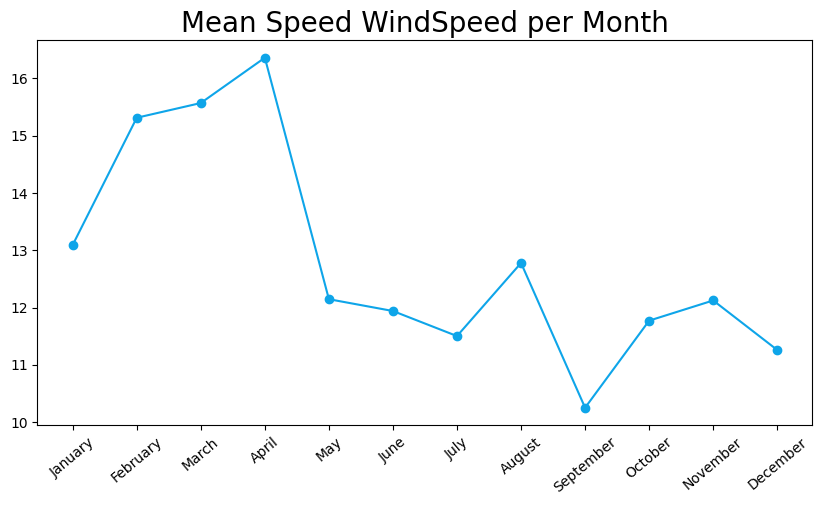

In [52]:
year_windspeed = day_df[day_df.dteday.dt.year == 2011]
year_windspeed = year_windspeed.resample(rule='M', on='dteday').agg({
    "windspeed": "mean"
})

year_windspeed.index = year_windspeed.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.plot(year_windspeed.index, year_windspeed['windspeed'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Mean Speed WindSpeed per Month', loc='center', fontsize=20)
plt.show()

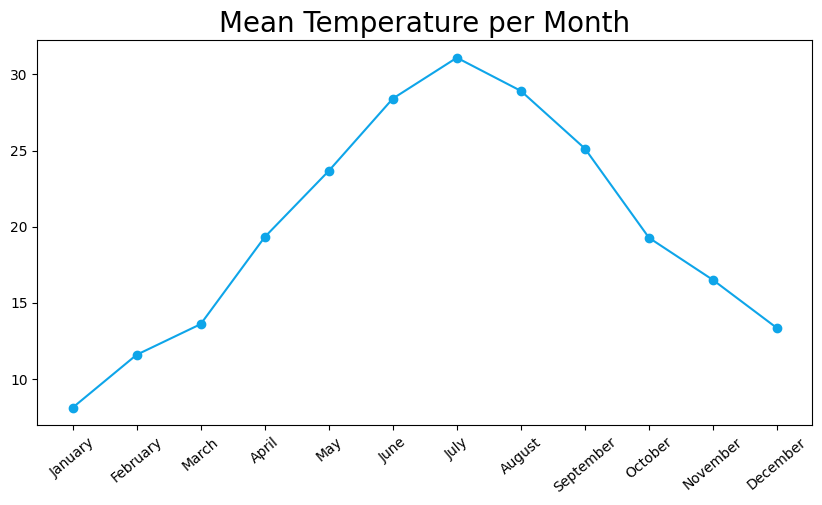

In [59]:
year_temp = day_df[day_df.dteday.dt.year == 2011]
year_temp = year_temp.resample(rule='M', on='dteday').agg({
    "temp": "mean"
})

year_temp.index = year_temp.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.plot(year_temp.index, year_temp['temp'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Mean Temperature per Month', loc='center', fontsize=20)
plt.show()

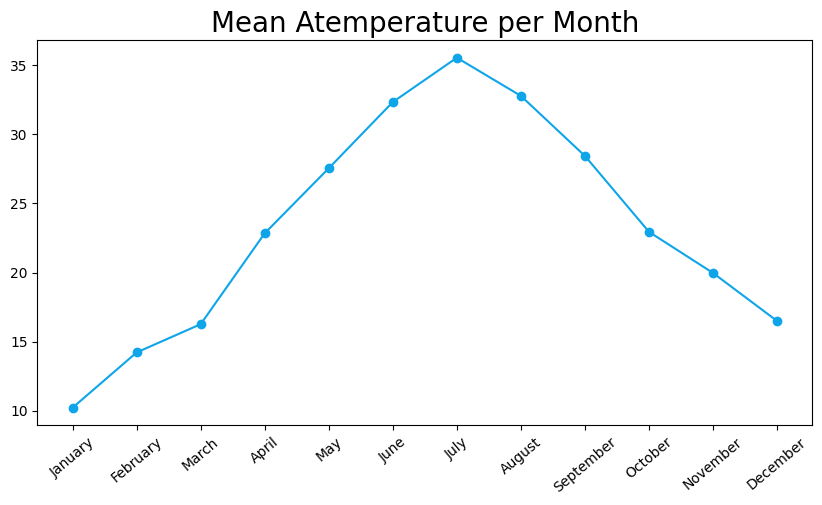

In [61]:
year_atemp = day_df[day_df.dteday.dt.year == 2011]
year_atemp = year_atemp.resample(rule='M', on='dteday').agg({
    "atemp": "mean"
})

year_atemp.index = year_atemp.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.plot(year_atemp.index, year_atemp['atemp'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Mean Atemperature per Month', loc='center', fontsize=20)
plt.show()

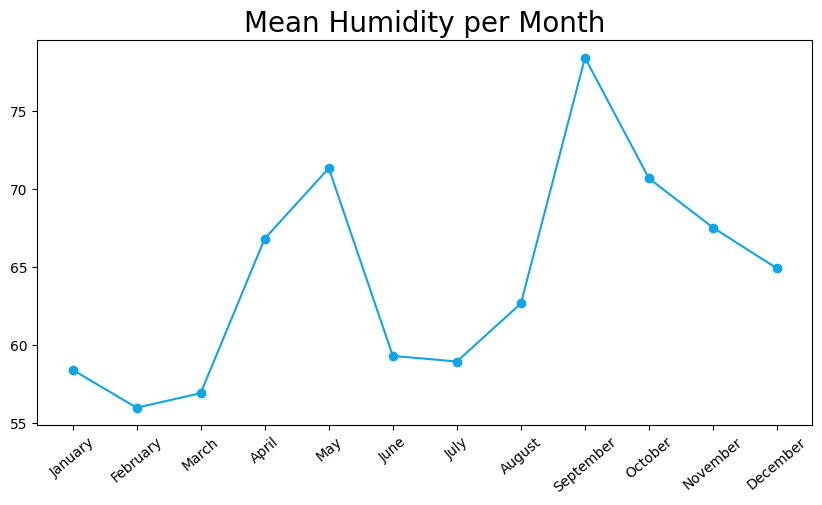

In [62]:
year_hum = day_df[day_df.dteday.dt.year == 2011]
year_hum = year_hum.resample(rule='M', on='dteday').agg({
    "hum": "mean"
})

year_hum.index = year_hum.index.strftime('%B')

plt.figure(figsize=(10, 5))
plt.plot(year_hum.index, year_hum['hum'], marker='o', color='#0ea5e9')
plt.xticks(rotation=40)
plt.title(label='Mean Humidity per Month', loc='center', fontsize=20)
plt.show()

In [65]:
day_df[day_df.mnth == 4]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
90,91,2011-04-01,2,0,4,0,5,1,2,12.300000,14.17270,68.6250,17.333436,307,1920,2227
91,92,2011-04-02,2,0,4,0,6,0,2,12.915000,15.78185,65.3750,13.208782,898,1354,2252
92,93,2011-04-03,2,0,4,0,0,0,1,15.511653,18.93835,48.0000,12.208271,1651,1598,3249
93,94,2011-04-04,2,0,4,0,1,1,1,23.506653,27.14645,42.6250,25.833257,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,16.980847,19.91750,64.2083,26.000489,167,1628,1795
95,96,2011-04-06,2,0,4,0,3,1,1,16.024153,19.38040,47.0833,17.625221,413,2395,2808
96,97,2011-04-07,2,0,4,0,4,1,1,17.937500,21.68480,60.2917,10.874904,571,2570,3141
97,98,2011-04-08,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471
98,99,2011-04-09,2,0,4,0,6,0,2,14.042500,17.07645,87.7500,8.916561,879,1576,2455
99,100,2011-04-10,2,0,4,0,0,0,2,17.493347,21.33685,85.7500,9.833389,1188,1707,2895


In [63]:
day_df[day_df.mnth == 7]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
181,182,2011-07-01,3,0,7,0,5,1,1,29.622500,32.60810,39.6250,6.874736,1246,4116,5362
182,183,2011-07-02,3,0,7,0,6,0,1,30.271653,33.36540,44.4583,7.709154,2204,2915,5119
183,184,2011-07-03,3,0,7,0,0,0,2,29.383347,33.42875,68.2500,15.333486,2282,2367,4649
184,185,2011-07-04,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
185,186,2011-07-05,3,0,7,0,2,1,1,30.613347,34.81690,59.0417,8.459286,1031,3634,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,574,2012-07-27,3,1,7,0,5,1,1,32.048347,36.71085,59.4583,10.250464,1259,5645,6904
574,575,2012-07-28,3,1,7,0,6,0,1,30.989153,34.88020,61.3333,10.542450,2234,4451,6685
575,576,2012-07-29,3,1,7,0,0,0,1,29.588347,33.39665,62.3750,11.416532,2153,4444,6597
576,577,2012-07-30,3,1,7,0,1,1,1,29.964153,34.24935,66.8750,10.292339,1040,6065,7105


In [64]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

## Pertanyaan 1:
Berapa Rata Rata Kecepatan Angin Pada tahun 2011,Berapa Suhu Temperature pada tahun 2011

> Dari Data diatas menunjukan bahwa pada musim gugur banyak orang bersepeda hal tersebut menunjukan bahwa dengan suhu yang cukup panas dapat membakar banyak kalori sehingga banyak yang bersepeda pada bulan july dan bertepatan pada musim gugur



> Dan pada data diatas yaitu ketika musim panas dan bertepatan pada bulan april banyak orang juga melakukan bersepeda karena angin dan suhu yang cukup baik untuk bersepeda pada musim tersebut





### Pertanyaan 2: Berapa jumlah penyewa sepeda yang telah terdaftar dan yang belum terdaftar di tiap tahun

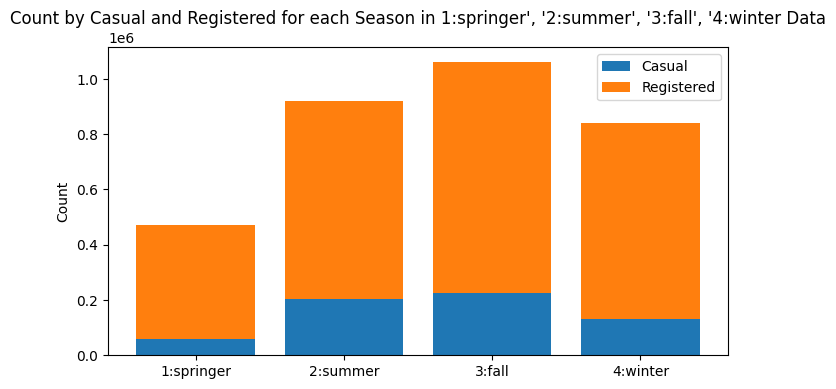

In [53]:
plt.figure(figsize=(8,4))
p1 = plt.bar(day_df['season'].unique(),
             day_df.groupby(['season'])['casual'].sum())
p2 = plt.bar(day_df['season'].unique(),  # the x locations for the groups
             day_df.groupby(['season'])['registered'].sum(), # Count of Registered per season
             bottom = day_df.groupby(['season'])['casual'].sum()) # Count of casual per season

plt.ylabel('Count')
plt.title("Count by Casual and Registered for each Season in 1:springer', '2:summer', '3:fall', '4:winter Data")
plt.xticks(day_df['season'].unique(), ('1:springer', '2:summer', '3:fall', '4:winter')) # Name of unique values in columns
plt.legend((p1[0], p2[0]), ('Casual', 'Registered')) #setting legends as per target
plt.show()

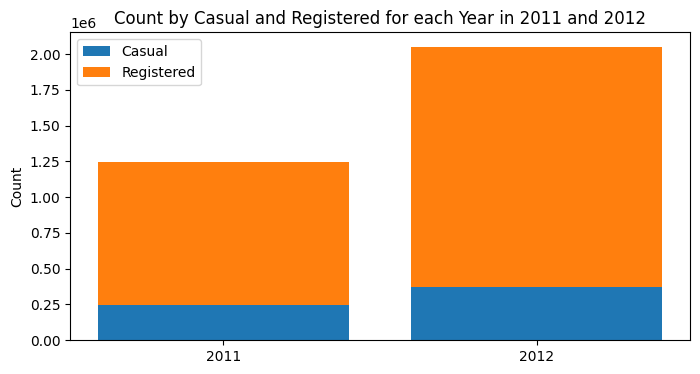

In [54]:
plt.figure(figsize=(8,4))
p1 = plt.bar(day_df['yr'].unique(),
             day_df.groupby(['yr'])['casual'].sum())
p2 = plt.bar(day_df['yr'].unique(),  # the x locations for the groups
             day_df.groupby(['yr'])['registered'].sum(), # Count of Registered per season
             bottom = day_df.groupby(['yr'])['casual'].sum()) # Count of casual per season

plt.ylabel('Count')
plt.title("Count by Casual and Registered for each Year in 2011 and 2012")
plt.xticks(day_df['yr'].unique(), ('2011','2012')) # Name of unique values in columns
plt.legend((p1[0], p2[0]), ('Casual', 'Registered')) #setting legends as per target
plt.show()

In [55]:
day_df.groupby(by="yr").casual.nunique().sort_values(ascending=False)

yr
1    332
0    328
Name: casual, dtype: int64

# Pertanyaan 2
Berapa jumlah penyewa sepeda yang telah terdaftar dan yang belum terdaftar di tiap tahun

> Terlihat pada data diatas menunjukan bahwa jumlah penyewa sepeda terus meningkat setiap tahun pada tahun 2011 jumlah penyewa sepeda terlihat cukup banyak yaitu sekitar 328 jumlah yang menyewa sepeda kemudian pada tahun berikutnya terjadi peningkatan yaitu sekitar 328 orang yang menyewa sepeda hal ini menunjukan bahwa jumlah peminat bersepada terus meningkat setiap tahunnya.



[Text(0.5, 1.0, 'Count of bikes during different months')]

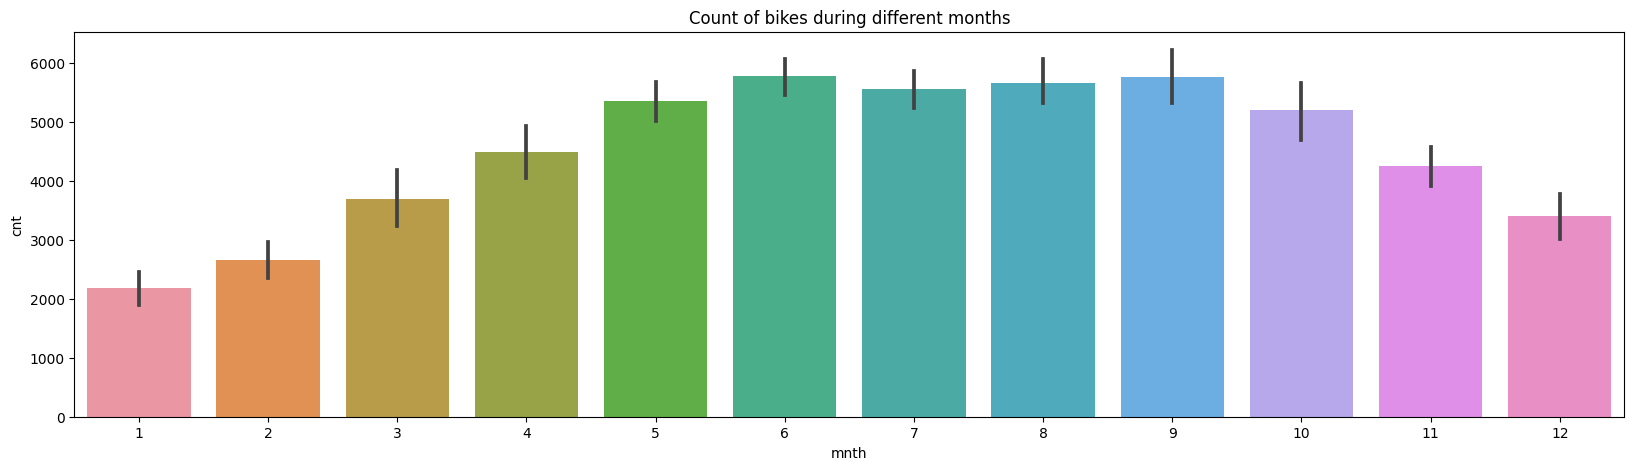

In [56]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=day_df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

In [57]:
rfm_df = day_df.groupby(by=['temp', 'atemp', 'hum', 'windspeed']).agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed" : "mean"
})
rfm_df.columns = ["temperature", "Feeling Temperature", "Humidity","Windspeed"]

rfm_df = rfm_df.mean().sort_values(ascending=True)

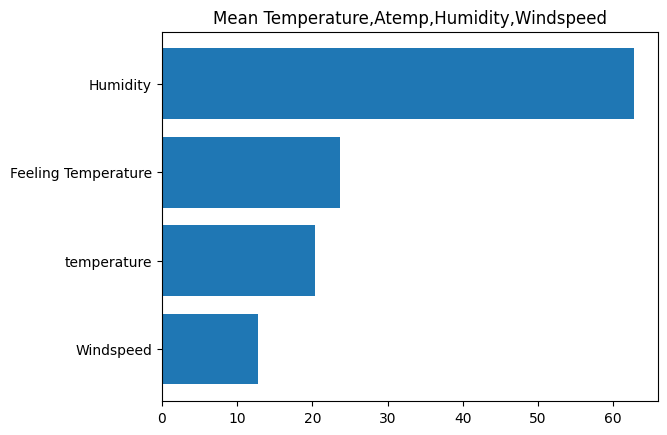

In [58]:
plt.barh(rfm_df.index, rfm_df.values)
plt.title(label="Mean Temperature,Atemp,Humidity,Windspeed")
plt.xlabel("")
plt.ylabel("")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berapa Kecepatan Rata rata angin pada tahun 2011

> Pada data yang telah diatas bisa kita liat bahwa rata rata kecepatan angin tiap bulan berbeda-beda Tingkat paling tinggi yaitu pada bulan April yaitu ketika musim panas.Kemudian kecepatan angin kembali menurun dibulan berikutnya seiring bergantinya musim dan pada musim panas ini banyak orang yang menyewa sepeda pada bulan dan musim tersebut.

- conclution pertanyaan 2 : Berapa jumlah penyewa sepeda yang telah terdaftar dan yang belum terdaftar di tiap tahun

> Setiap Tahunnya penyewa sepeda memiliki peningkatan.Pada tahun 2011 banyak penyewa sepeda yang sudah menjadi member dan ada beberapa penyewa sepeda yang belum menjadi member.Kemudian ditahun selanjutnya pada tahun 2012 jumlah penyewa sepeda meningkat dan jumlah penyewa sudah menjadi member pun memiliki peningkatan

